In [4]:
import numpy as np
import matplotlib.pyplot as plt

from planar_code import PlanarCode
from graph_operations import *
from visualization import *

L, W = (8, 8)
p = np.full((L,W,2), 0.1)
p_dual = np.full((L+1,W-1,2), 0.05)
#p=0.1
#p_dual=0.1
planar_code = PlanarCode(L=L, W=W, p=p, p_dual=p_dual, boundaries=np.array((1,0), dtype=int))
planar_code.advance(1)

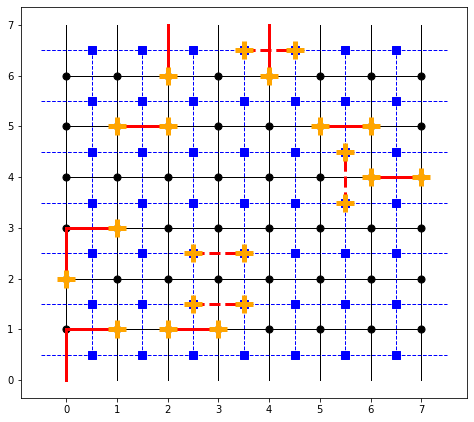

In [5]:
plot_planar_code(planar_code, plot_dual=True, show_errors=True, show_syndrome=True)

[(5, 5), (6, 5)]
[(2, 1), (3, 1)]
[(2, 5), (2, 6)]
[(6, 4), (7, 4)]
[(1, 3), (1, 4), (1, 5)]
[(8, 8), (4, 7), (4, 6)]
[(0, 2), (0, 1), (1, 1)]


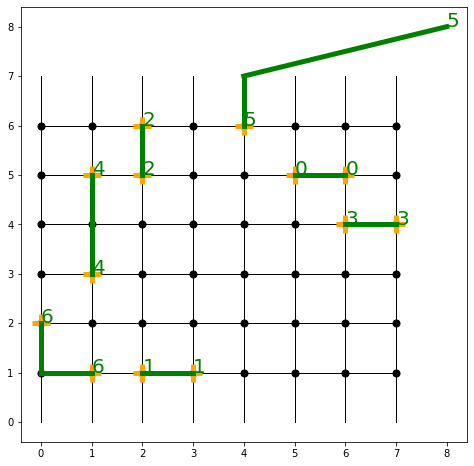

In [6]:
lattice = planar_code.primal
syndrome = planar_code.measure_syndrome()[0]
plot_matchings(lattice, syndrome, force_manhattan=False)